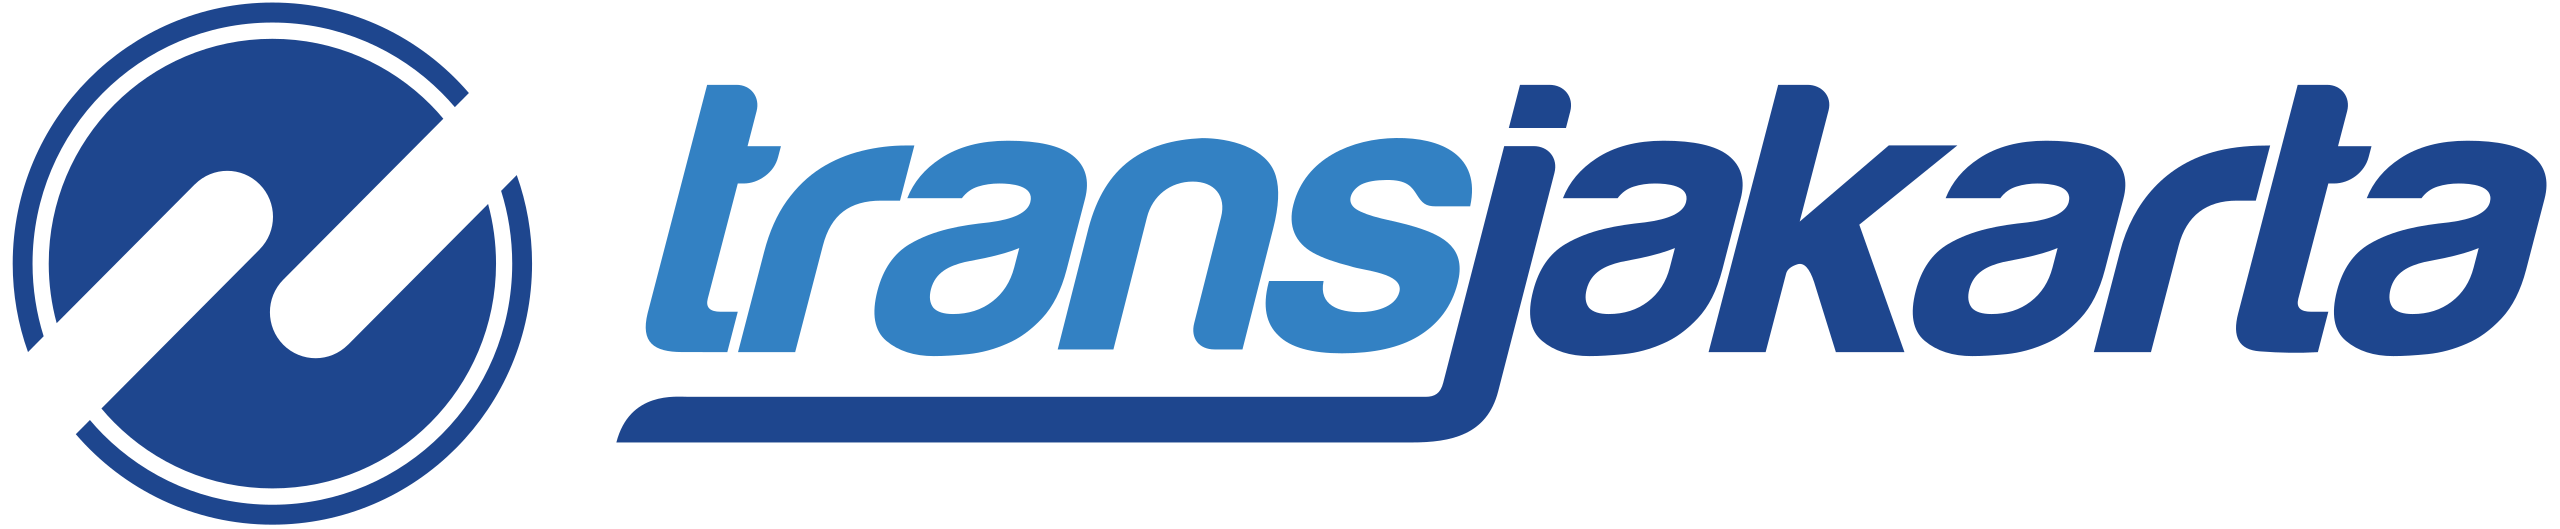

# **Transjakarta - Public Transportation Transaction**

## Latar Belakang

TransJakarta merupakan sistem transportasi Bus Rapid Transit (BRT) pertama di Asia Tenggara dan Asia Selatan dan memiliki rute terpanjang di dunia (208 km). Sistem BRT ini didasarkan pada sistem TransMilenio di Bogotá, Kolombia. TransJakarta resmi beroperasi sejak 1 Februari 2004. Sistem ini memiliki banyak pilihan layanan transportasi untuk pelanggan di Jakarta seperti BRT, Mikrotrans, dan Royaltrans.<br>

Penjelasan lebih lanjut dari layanan transportasi Transjakarta adalah sebagai berikut:

- Bus Rapid Transit (BRT) : <br>BRT adalah layanan andalan Transjakarta yang menggunakan jalur khusus (busway) untuk memastikan perjalanan yang cepat dan efisien, mengurangi dampak kemacetan di Jakarta. Bus hanya beroperasi di jalur busway yang dirancang untuk menghindari gangguan lalu lintas. Koridor tertentu menyediakan layanan sepanjang malam (AMARI) untuk penumpang yang bepergian di luar jam reguler.
- Royaltrans : <br> Royaltrans adalah layanan premium dari Transjakarta yang dirancang untuk penumpang kelas menengah ke atas, menawarkan kenyamanan lebih dibandingkan layanan BRT reguler. Royaltrans menghubungkan daerah penyangga dengan daerah pusat. Layanan ini memiliki fasilitas yang lebih dibandingkan layanan yang lain dengan harga yang lebih tinggi.
- Mikrotrans : <br> Mikrotrans adalah layanan angkutan kecil yang terintegrasi dengan sistem Transjakarta, bertujuan untuk menjangkau wilayah yang sulit dilalui bus besar. Layanan ini gratis, tetapi harus memiliki Kartu Uang Elektronik.



## Pernyataan Masalah

Transjakarta ingin mendapatkan wawasan mengenai perilaku penumpang pada bulan April 2023 berdasarkan data pada kartu pembayaran, waktu layanan, dan rute yang paling ramai berdasarkan jenis layanan. Data

Sebagai seorang *Data Analyst*, ada pertanyaan yang harus dijawab, yaitu :<br>

1. Bagaimana persebaran penumpang yang menggunakan Transjakarta berdasarkan data pada kartu pembayaran?
2. Bagaimana persebaran penumpang yang menggunakan Transjakarta berdasarkan waktu?
3. Bagaimana persebaran penumpang yang menggunakan Transjakarta berdasarkan rute?

Setelah dilakukan analisis, diharapkan dapat memberikan rekomendasi yang dapat mengoptimalisasi pelayanan Transjakarta baik secara umum maupun spesifik berdasarkan jenis layanan.

## Data

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Data yang akan digunakan terdiri dari 22 kolom, dengan penjelasan tiap kolom adalah sebagai berikut:<br>

1. transID: Id transaksi unik untuk setiap transaksi<br>
2. payCardID: Pengenal utama pelanggan. Kartu yang digunakan pelanggan sebagai tiket masuk dan keluar.<br>
3. payCardBank: Nama bank penerbit kartu pelanggan<br>
4. payCardName: Nama pelanggan yang tercantum dalam kartu.<br>
5. payCardSex: Jenis kelamin pelanggan yang tertanam di dalam kartu<br>
6. payCardBirthDate: Tahun kelahiran pelanggan<br>
7. corridorID: ID Koridor / ID Rute sebagai kunci untuk pengelompokan rute.<br>
8. corridorName: Nama Koridor / Nama Rute yang berisi Start dan Finish untuk setiap rute.<br>
9. direction: 0 untuk Pergi, 1 untuk Kembali. Arah dari rute.<br>
10. tapInStops: Ketuk Masuk (pintu masuk) ID Halte untuk mengidentifikasi nama halte<br>
11. tapInStopsName (Nama Halte): Tap In (pintu masuk) Nama Halte tempat pelanggan mengetuk masuk.<br>
12. tapInStopsLat: Garis Lintang Halte Tap In<br>
13. tapInStopsLon: Garis Bujur Perhentian Tap In (pintu masuk)<br>
14. stopStartSeq: Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dll. Terkait dengan arah.<br>
15. tapInTime: Waktu tap in. Tanggal dan waktu<br>
16. tapOutStops: Tap Out (Keluar) ID Pemberhentian untuk mengidentifikasi nama pemberhentian<br>
17. tapOutStopsName: Tap out (keluar) Nama Halte tempat pelanggan melakukan tap out.<br>
18. tapOutStopsLat: Garis Lintang Tap Out (keluar) Halte<br>
19. tapOutStopsLon: Bujur dari Tap Out Stops<br>
20. stopEndSeq: Urutan pemberhentian, pemberhentian pertama, pemberhentian kedua, dst. Terkait dengan arah.<br>
21. tapOutTime: Waktu tap out. Tanggal dan waktu<br>
22. payAmount: Jumlah yang harus dibayar pelanggan. Ada yang gratis. Beberapa tidak.<br>

Berikut merupakan 5 data teratas dari data:

In [50]:
pd.options.display.max_colwidth = None
df = pd.read_csv("Transjakarta.csv")
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


## Data Understanding

Sebelum melakukan analisis data, perlu dilakukan pemahaman mengenai data yang telah diberikan. Pemahaman data diperlukan untuk mengetahui apa saja anomali yang terdapat pada data, sehingga nantinya dapat dilakukan pembersihan data.<br>

Hal pertama yang dilakukan yaitu melihat informasi data.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

In [52]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,FMZZ963S4B68ZP,dki,Suci Wacana,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-06 17:35:40,P00016,BKN,2023-04-24 06:53:50
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [53]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

### Missing Value

Selanjutnya dilihat jumlah data yang hilang.

In [54]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

Berikut merupakan data yang hilang dalam persentase:

In [55]:
missing_percentage = (df.isnull().sum() / len(df) * 100).reset_index()
missing_percentage.columns = ['Column', 'Missing_Percentage']
overall_missing_percentage = pd.DataFrame({
    'Column': ['Overall'],
    'Missing_Percentage': [df.isnull().sum().sum() / df.size * 100]
})
missing_percentage = pd.concat([missing_percentage, overall_missing_percentage], ignore_index=True)
print(missing_percentage)

              Column  Missing_Percentage
0            transID            0.000000
1          payCardID            0.000000
2        payCardBank            0.000000
3        payCardName            0.000000
4         payCardSex            0.000000
5   payCardBirthDate            0.000000
6         corridorID            3.316623
7       corridorName            5.092348
8          direction            0.000000
9         tapInStops            3.200528
10    tapInStopsName            0.000000
11     tapInStopsLat            0.000000
12     tapInStopsLon            0.000000
13      stopStartSeq            0.000000
14         tapInTime            0.000000
15       tapOutStops            6.039578
16   tapOutStopsName            3.546174
17    tapOutStopsLat            3.546174
18    tapOutStopsLon            3.546174
19        stopEndSeq            3.546174
20        tapOutTime            3.546174
21         payAmount            2.656992
22           Overall            1.728952


### Duplicated Rows

Terakhir dapat dilihat berapa banyak data yang *duplicate*.

In [56]:
df.duplicated().sum()

np.int64(0)

Berdasarkan pemahaman yang telah dilakukan, dapat diperhatikan beberapa hal, yaitu:

1. Data memiliki 37900 Baris dan 22 Kolom.
2. Kolom *payCardID* memiliki Dtype int64.
2. Kolom *tapInTime* dan *tapOutTime* memiliki Dtype object.
3. Missing values pada kolom *corridorID*, *corridorName*, *tapInStops*, *tapOutStops*, *tapOutStopsName*, *tapOutStopsLat*, *tapOutStopsLon*, *stopEndSeq*, *tapOutTime*, dan *payAmount* memiliki persentase sekitar 3.3% hingga 6.1%. Missing values secara keseluruhan sebesar 1.73%.
4. Tidak terdapat data duplikat.

Untuk menangani beberapa permasalahan tersebut, dapat dilakukan hal-hal berikut:

1. Mengganti Dtype payCardID menjadi object dan tapInTime & tapOutTime menjadi datetime64.
2. Menghapus semua baris yang memiliki missing value (Tidak disarankan).
3. Mengisi missing value berdasarkan keterkaitan dengan kolom lain sehingga mengurangi missing value tersebut. Apabila sudah tidak bisa dilakukan pengisian missing value, maka akan dilakukan penghapusan. (Disarankan).

## Data Cleaning

Data Cleaning dilakukan dengan pengisian missing values, penghapusan baris, dan mengganti Dtype yang tidak sesuai. <br>
Selain itu, di akhir akan dilakukan pengelompokan berdasarkan jenis layanan dan melakukan pengecekan apakah pengelompokan sudah sesuai.

### Mengganti Dtype *payCardID* menjadi *object*

Aksi ini dilakukan karena payCardID merupakan ID, sehingga lebih baik menggunakan object walaupun ID berupa angka.

In [57]:
df['payCardID'] = df['payCardID'].astype(object)

### Mengganti Dtype *tapInTime* dan *tapOutTime* menjadi *datetime*

Aksi ini dilakukan karena tapInTime dan tapOutTime berupa tanggal dan waktu, sehingga lebih baik menggunakan datetime.

In [58]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

### Mengisi *missing values* dari *tapInStops* berdasarkan *tapInStopsName*

Aksi ini dilakukan karena tapInStops dan tapInStopsName selalu berkaitan.

In [59]:
tapInMap = df.dropna(subset=['tapInStops', 'tapInStopsName']).set_index('tapInStopsName')['tapInStops'].to_dict()

df['tapInStops'] = df['tapInStops'].fillna(df['tapInStopsName'].map(tapInMap))

### Mengisi *missing values* dari *tapOutStops* berdasarkan *tapOutStopsName*

Aksi ini dilakukan karena tapOutStops dan tapOutStopsName selalu berkaitan.

In [60]:
tapOutMap = df.dropna(subset=['tapOutStops', 'tapOutStopsName']).set_index('tapOutStopsName')['tapOutStops'].to_dict()

df['tapOutStops'] = df['tapOutStops'].fillna(df['tapOutStopsName'].map(tapOutMap))

### Mengisi *missing values* dari *corridorID* berdasarkan *corridorName*

Aksi ini dilakukan karena corridorID dan corridorName selalu berkaitan.

In [61]:
corridorMap1 = df.dropna(subset=['corridorID', 'corridorName']).set_index('corridorName')['corridorID'].to_dict()

df['corridorID'] = df['corridorID'].fillna(df['corridorName'].map(corridorMap1))

### Mengisi *missing values* dari *corridorName* berdasarkan *corridorID*

Aksi ini dilakukan dengan alasan yang sama dengan sebelumnya.

In [62]:
corridorMap2 = df.dropna(subset=['corridorName', 'corridorID']).set_index('corridorID')['corridorName'].to_dict()

df['corridorName'] = df['corridorName'].fillna(df['corridorID'].map(corridorMap2))

### Menghapus baris yang memiliki missing value lebih dari 6 

In [63]:
df[df['tapOutStopsName'].isna()].head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,...,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,NaN,NaT,0.0
30,TCKQ601Q5O01BC,3589380857722689,dki,drg. Lukman Hidayanto,M,1995,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00001P,...,106.83210,19,2023-04-03 06:14:02,NaN,NaN,NaN,NaN,NaN,NaT,0.0
70,OTGH855B8A29BP,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,0.0,B02408P,...,106.82190,7,2023-04-03 05:57:55,NaN,NaN,NaN,NaN,NaN,NaT,20000.0
130,JUKK703H7F00XH,570918242399,flazz,Mumpuni Gunarto,F,1998,10D,Kampung Rambutan - Tanjung Priok,0.0,P00035,...,106.87920,7,2023-04-03 05:40:04,NaN,NaN,NaN,NaN,NaN,NaT,3500.0
192,KKPV811K6H59ZY,3548650711273610,dki,Balangga Permadi,F,2011,3F,Kalideres - Gelora Bung Karno,0.0,P00050,...,106.73810,11,2023-04-03 06:15:53,NaN,NaN,NaN,NaN,NaN,NaT,3500.0


Dapat dilihat bahwasannya banyak baris yang memiliki *tapOutStops* dan sejenisnya dengan missing value. Hal ini mungkin disebabkan oleh penumpang yang turun dipinggir jalan sehingga tidak melakukan *Tap Out*. Dikarenakan banyaknya kolom dalam baris yang bernilai NaN, maka baris tersebut akan dihapus.

In [64]:
df = df.dropna(thresh=len(df.columns) - 5, axis=0)

### Mengisi CorridorID dan CorridorName berdasarkan tapInStopsLat dan tapInStopsLon

Karena terdapat beberapa baris yang memiliki corridorID dan corridorName yang kosong, maka akan dilakukan pencocokan dengan tapInStopsLat dan tapInStopsLon. Hal ini dikarenakan Corridor selalu berhubungan dengan tapInStopsLat dan tapInStopsLon.

In [65]:
location_to_corridor = df.dropna(subset=['corridorID', 'corridorName']).groupby(['tapInStopsLat', 'tapInStopsLon']).agg({'corridorID': 'first', 'corridorName': 'first'}).to_dict(orient='index')

def fill_corridor_info(row):
    key = (row['tapInStopsLat'], row['tapInStopsLon'])
    if pd.isna(row['corridorID']) or pd.isna(row['corridorName']):
        if key in location_to_corridor:
            row['corridorID'] = location_to_corridor[key]['corridorID']
            row['corridorName'] = location_to_corridor[key]['corridorName']
    return row

df = df.apply(fill_corridor_info, axis=1)

### Mengisi *missing values* dari payAmount berdasarkan CorridorID

Aksi ini dilakukan karena jumlah payAmount ditentukan oleh jenis corridorID.

In [66]:
payAmountMap = df.dropna(subset=['payAmount', 'corridorID']).set_index('corridorID')['payAmount'].to_dict()

df['payAmount'] = df['payAmount'].fillna(df['corridorID'].map(payAmountMap))

Sekarang dapat dilihat berapa sisa missing values setelah melakukan *Data Cleaning*.

In [67]:
df.isna().sum()

transID              0
payCardID            0
payCardBank          0
payCardName          0
payCardSex           0
payCardBirthDate     0
corridorID          32
corridorName        32
direction            0
tapInStops          32
tapInStopsName       0
tapInStopsLat        0
tapInStopsLon        0
stopStartSeq         0
tapInTime            0
tapOutStops         19
tapOutStopsName      0
tapOutStopsLat       0
tapOutStopsLon       0
stopEndSeq           0
tapOutTime           0
payAmount            0
dtype: int64

Dapat terlihat bahwasannya sudah banyak missing values yang sudah terisi berdasarkan data cleaning.

### Menghapus *missing values*

Sebelum menghapus missing values, perlu diketahui apakah missing values yang terdapat merupakan unik. Artinya, sudah tidak dapat dilakukan pencocokan dengan kolom sebelumnya.

In [68]:
df[df['tapInStops'].isna()][["tapInStopsName"]].nunique()

tapInStopsName    31
dtype: int64

In [69]:
df[df['tapOutStops'].isna()][["tapOutStopsName"]].nunique()

tapOutStopsName    19
dtype: int64

Dikarenakan 31 dari 32 tempat adalah unik dengan 1 penumpang saja yang menggunakan layanan dan 19 tempat adalah unik dengan 1 penumpang yang selesai menggunakan layanan, maka diputuskan untuk menghapus baris tersebut karena dianggap tidak wajar.

In [70]:
df.dropna(inplace=True)

In [71]:
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

### Melakukan Pengelompokan Berdasarkan Jenis Layanan

Pengelompokkan dilakukan dengan tujuan kita dapat mengetahui jenis layanan apa yang digunakan oleh penumpang. Setelah melakukan pengelompokkan, maka akan dilakukan pengecekan apakah hasil data sudah sesuai. <br>
Pada pengolahan data ini, jenis layanan dikelompokkan menjadi tiga bagian, yaitu:

1. Royaltrans : Bus Premium dengan tarif 20000
2. Mikrotrans : Angkutan Umum dengan titik penjemputan pada koridor yang memiliki ID awalan **JAK**
3. BRT : Bus Reguler

In [72]:
df['bus_type'] = df.apply(
    lambda row: 'Royaltrans' if row['payAmount'] == 20000 else
                'Mikrotrans' if str(row['corridorID']).startswith('JAK') else
                'BRT',
    axis=1
)
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,bus_type
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,BRT
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,BRT
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,BRT
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,BRT
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,BRT


Selanjutnya akan melakukan pengecekan apakah jenis layanan yang dikelompokkan sudah sesuai.

In [73]:
df[df['bus_type']=='Royaltrans']['payAmount'].unique()

array([20000.])

Dapat terlihat bahwa sudah benar bahwasannya semua layanan yang memiliki tarif sebesar 20000 merupakan Royaltrans

In [74]:
df[df['bus_type']=='Mikrotrans']['payAmount'].unique()

array([   0., 3500.])

Dapat terlihat bahwa meskipun sudah dilakukan pengelompokkan berdasarkan corridorID, beberapa Mikrotrans masih memiliki tarif sebesar 3500. Berdasarkan [laman Jakarta Smart City](https://smartcity.jakarta.go.id/id/blog/apa-bedanya-jaklingko-dengan-mikrotrans/), harga Mikrotrans seharusnya 0 rupiah. Untuk menangani masalah ini, dapat dilakukan perubahan nilai payAmount semua angkutan Mikrotrans menjadi 0 rupiah.

In [75]:
df['payAmount'].mask(df['bus_type'] == 'Mikrotrans', 0, inplace=True)
df[df['bus_type']=='Mikrotrans']['payAmount'].unique()

array([0.])

Untuk jenis layanan BRT tidak dilakukan analisis spesifik dikarenakan BRT merupakan bus reguler Transjakarta dengan harga 3500 (Gratis bagi yang memiliki Kartu Layanan Gratis), sehingga hanya perlu untuk memastikan apakah nilai payAmount sebesar 0 atau 3500.

In [76]:
df[df['bus_type']=='BRT']['payAmount'].unique()

array([3500.,    0.])

## Data Analysis

Setelah selesai melakukan *Data Cleaning*, dapat dilakukan analisis berdasarkan pertanyaan yang telah dirumuskan dalam pernyataan masalah.<br>

Analasis yang akan dilakukan mencakup:
1. Persebaran penumpang berdasarkan data pada kartu pembayaran
2. Persebaran penumpang berdasarkan waktu
3. Persebaran penumpang berdasarkan rute

### Persebaran Penumpang Berdasarkan Data pada Kartu Pembayaran

Berdasarkan data penumpang yang terdapat dalam payCard, maka akan dilakukan pembagian yaitu berdasarkan umur, jenis kelamin, dan jenis bank yang digunakan. <br>
Analisis ini dilakukan untuk mengetahui siapa saja yang menggunakan Transjakarta serta jenis bank apa saja yang mereka gunakan.

#### Persebaran Penumpang Berdasarkan Umur

Umur dikelompokkan berdasarkan website [Kementrian Kesehatan (Kemenkes)](https://ayosehat.kemkes.go.id/kategori-usia), dengan pengelompokkan adalah sebagai berikut:
1. Bayi dan Balita (<5 Tahun)
2. Anak-anak (5 hingga 9 Tahun)
3. Remaja (10 hingga 18 Tahun)
4. Dewasa (19 hingga 59 Tahun)
5. Lansia (60+ Tahun)

Untuk menentukan umur penumpang, maka dapat dilakukan pengurangan tahun penumpang Tap In dengan tahun kelahiran penumpang.

In [77]:
df['age'] = df['tapInTime'].dt.year - df['payCardBirthDate']

In [78]:
bins = [0, 5, 10, 19, 60, 200]
labels = ['Bayi dan Balita', 'Anak-anak', 'Remaja', 'Dewasa', 'Lansia']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [79]:
df['age_group'].value_counts()

age_group
Dewasa             29818
Remaja              5913
Lansia               743
Bayi dan Balita        0
Anak-anak              0
Name: count, dtype: int64

Dikarenakan tidak ada Bayi dan Balita serta Anak-anak dalam dataset, maka akan dihapus untuk memudahkan dalam mengolah data kedepannya.

In [80]:
bins = [10, 19, 60, 200]
labels = ['Remaja', 'Dewasa', 'Lansia']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

Selanjutnya akan dibuat grafik persebaran penumpang berdasarkan usia.

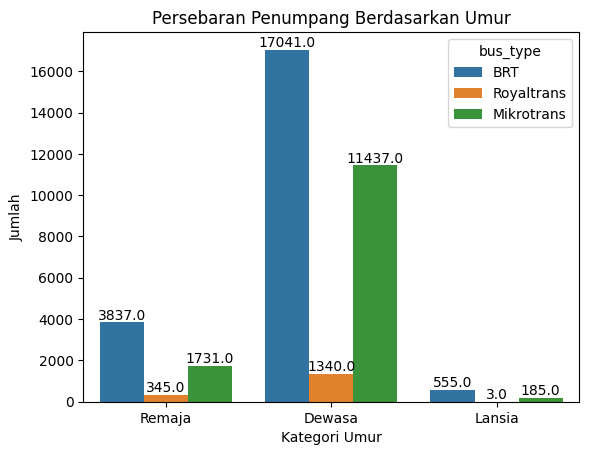

In [ ]:
ax = sns.countplot(x='age_group', data=df, hue="bus_type")

plt.title('Persebaran Penumpang Berdasarkan Umur')
plt.xlabel('Kategori Umur')
plt.ylabel('Jumlah')
plt.show()

#### Persebaran Penumpang Berdasarkan Jenis Kelamin

Berdasarkan [UU No. 24 Tahun 2013 Pasal 64](https://www.kemhan.go.id/ppid/wp-content/uploads/sites/2/2016/10/UU-24-Tahun-2013.pdf), Jenis kelamin terdiri dari Laki-laki (M) dan perempuan (F). 

Selanjutnya akan dibuat grafik persebaran penumpang berdasarkan jenis kelamin.

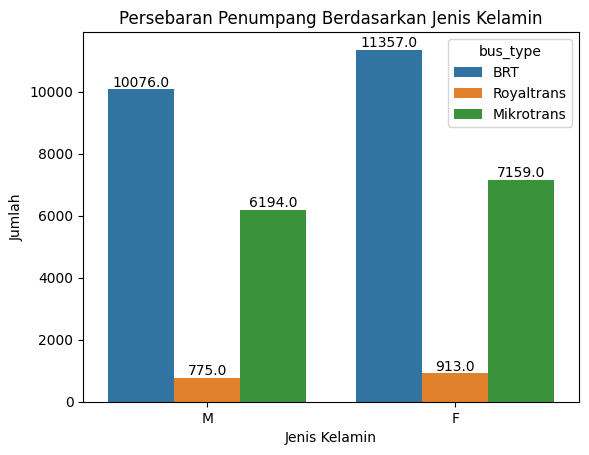

In [ ]:
ax = sns.countplot(x='payCardSex', data=df, hue="bus_type")

plt.title('Persebaran Penumpang Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()

#### Persebaran Penumpang Berdasarkan Jenis Bank

Jenis bank yang digunakan oleh penumpang yaitu **e-Money**, **Bank DKI**, **Flazz**, **Online**, **Brizzi**, dan **BNI**.

Selanjutnya akan dibuat grafik persebaran penumpang berdasarkan jenis kelamin.

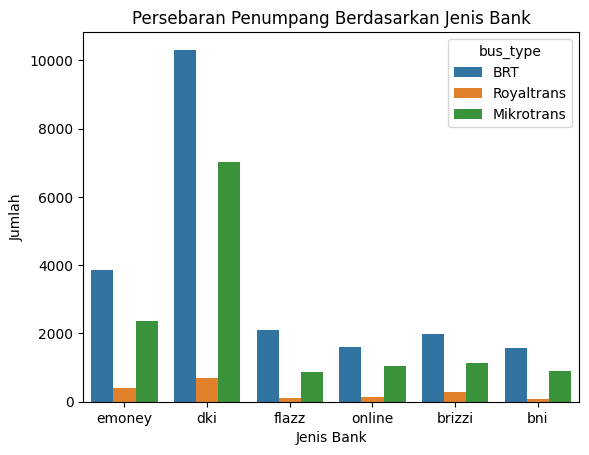

In [84]:
ax = sns.countplot(x='payCardBank', data=df, hue="bus_type")

plt.title('Persebaran Penumpang Berdasarkan Jenis Bank')
plt.xlabel('Jenis Bank')
plt.ylabel('Jumlah')
plt.show()

#### Analisis Persebaran Penumpang Berdasarkan Kartu Pembayaran

1. Berdasarkan umur, penumpang Transjakarta yang paling banyak terdapat dalam kategori **Dewasa**. <br>
Kategori Dewasa sangat banyak karena umumnya terdiri dari pekerja dan mahasiswa yang memiliki rutinitas pekerjaan dan pendidikan.

2. Berdasarkan jenis kelamin, penumpang Transjakarta yang paling banyak merupakan **Perempuan**.<br>
Perempuan banyak menggunakan Transjakarta mungkin untuk berbagai keperluan, seperti bekerja, berbelanja, mengantar anak, atau kegiatan sosial. Selain itu, Transjakarta menyediakan fasilitas khusus, seperti kursi prioritas dan ruang khusus perempuan, sehingga banyak perempuan lebih memilih moda ini dibandingkan transportasi lain.

3. Berdasarkan jenis bank, penumpang Transjakarta paling banyak bertransaksi menggunakan **Bank DKI**. <br>
Banyaknya penggunakan Bank DKI disebabkan Bank DKI memiliki peran besar dalam penyediaan Kartu JakLingko, yang merupakan kartu multifungsi untuk pembayaran transportasi di Jakarta. Banyak penumpang menggunakan kartu ini karena praktis dan terintegrasi dengan berbagai moda transportasi lainnya. Selain itu mungkin juga disebabkan oleh domisili penumpang di DKI Jakarta.

### Persebaran Penumpang Berdasarkan Waktu

Analisa ini dilakukan untuk mengetahui kapan saja penumpang ramai menggunakan Transjakarta. <br>
Dalam analisa ini, akan dilihat beberapa hal, yaitu:

1. Persebaran penumpang berdasarkan hari dalam satu minggu
2. Persebaran penumpang selama bulan April 2023
3. Persebaran penumpang berdasarkan jam kerja

#### Persebaran Penumpang Berdasarkan Hari

Berdasarkan [Organisasi Standar Internasional (ISO 8601)](https://web.archive.org/web/20171020084445/https://www.loc.gov/standards/datetime/ISO_DIS%208601-1.pdf), terdapat 7 hari dalam 1 minggu, dengan hari Senin merupakan hari pertama.<br>
Selanjutnya akan dibuat grafik persebaran penumpang berdasarkan hari.

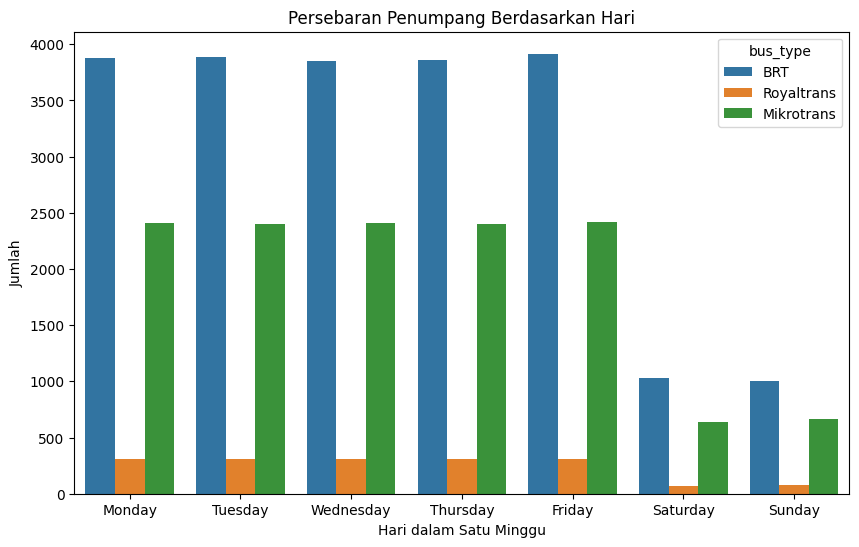

In [85]:
df['day_of_week'] = df['tapInTime'].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.countplot(
    x='day_of_week',
    data=df,
    order=day_order,
    hue='bus_type'
)
plt.title('Persebaran Penumpang Berdasarkan Hari')
plt.xlabel('Hari dalam Satu Minggu')
plt.ylabel('Jumlah')
plt.show()

#### Persebaran Penumpang Selama Bulan April 2023

Berdasarkan [Organisasi Standar Internasional (ISO 8601)](https://web.archive.org/web/20171020084445/https://www.loc.gov/standards/datetime/ISO_DIS%208601-1.pdf), terdapat 30 hari pada bulan April.<br>
Selanjutnya akan dibuat grafik persebaran penumpang selama satu bulan.

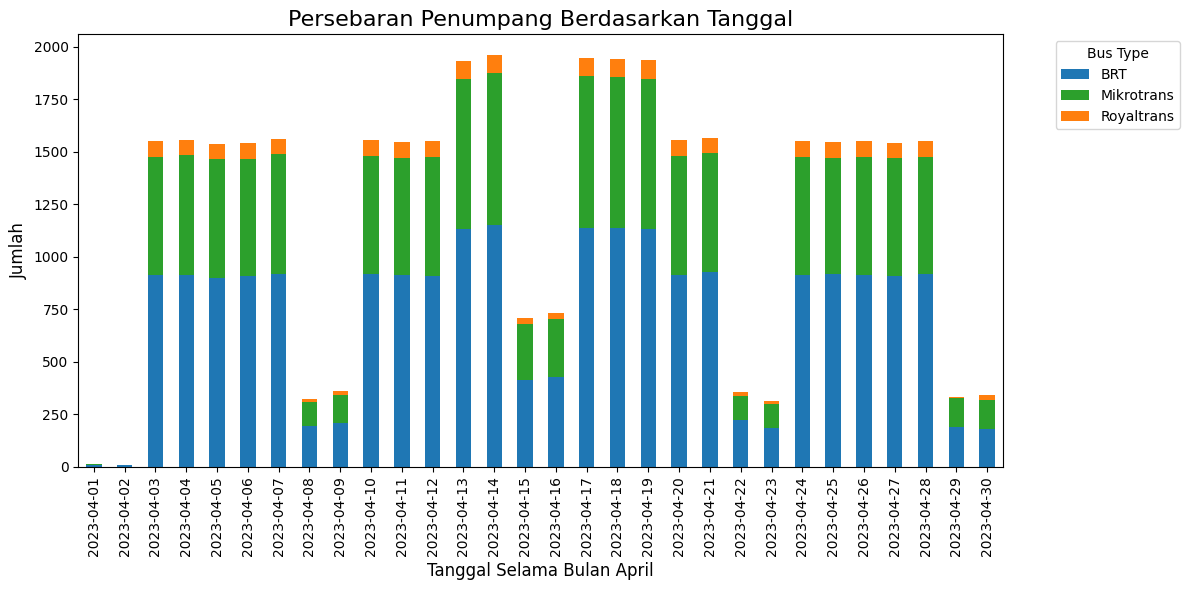

In [86]:
df['date'] = df.tapInTime.dt.date
stacked_data = df.groupby(['date', 'bus_type']).size().unstack(fill_value=0)

# Ensure the dates are sorted
stacked_data = stacked_data.sort_index()

bus_type_colors = {
    'BRT': '#1f77b4',        
    'Royaltrans': '#ff7f0e', 
    'Mikrotrans': '#2ca02c'  
}

colors = [bus_type_colors[bus_type] for bus_type in stacked_data.columns]

stacked_data.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    color=colors
)

plt.title('Persebaran Penumpang Berdasarkan Tanggal', fontsize=16)
plt.xlabel('Tanggal Selama Bulan April', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Bus Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Persebaran Penumpang Berdasarkan Jam Kerja

Berdasarkan [website Transjakarta](https://transjakarta.co.id/berita/transjakarta-perpanjang-jam-operasional-layanan-saat-laga-indonesia-vs-arab#:~:text=Dengan%20adanya%20perpanjangan%20jam%20operasional,WIB%20di%2014%20koridor%20utama.), layanan bus Transjakarta beroperasi mulai pukul 5 pagi hingga 10 malam untuk layanan reguler dan jam 10 malam hingga 5 pagi untuk Angkutan Malam Hari (AMARI). Maka akan dilakukan pengecekan apakah layanan bus Transjakarta pada data hanya layanan reguler atau sudah termasuk AMARI.

In [87]:
df.tapInTime.dt.time.min()

datetime.time(5, 0, 1)

In [88]:
df.tapInTime.dt.time.max()

datetime.time(21, 59, 59)

Berdasarkan data yang digunakan, maka jam operasi bus Transjakarta hanya jam layanan reguler. <br>
Selanjutnya dapat dilakukan pengelompokkan waktu dalam rentang jam layanan bus Transjakarta, dengan pengelompokan sebagai berikut:

1. Jam Berangkat Kerja (Pagi)   : 05.00 - 09.00
2. Jam Siang                    : 09.00 - 15.00 
3. Jam Pulang Kerja (Sore)      : 15.00 - 19.00
4. Jam Malam                    : 19.00 - 22.00

In [89]:
bins = [5, 9, 15, 19, 22] 
labels = ['Jam Berangkat Kerja (Pagi)', 'Jam Siang', 'Jam Pulang Kerja (Sore)', 'Jam Malam']

df['time_classification'] = pd.cut(df['tapInTime'].dt.hour, bins=bins, labels=labels, right=False)

Text(0, 0.5, 'Jumlah')

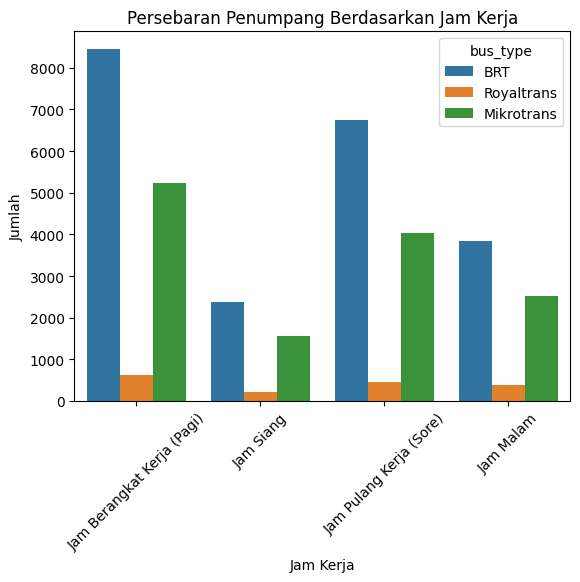

In [90]:
sns.countplot(data=df, x='time_classification', hue='bus_type')
plt.xticks(rotation=45)
plt.title('Persebaran Penumpang Berdasarkan Jam Kerja')
plt.xlabel('Jam Kerja')
plt.ylabel('Jumlah')

#### Analisis Persebaran Penumpang Berdasarkan Waktu

1. Berdasarkan hari, penumpang Transjakarta paling banyak ketika **Hari Kerja**. <br>
Pada hari kerja, mayoritas penumpang merupakan pekerja dan pelajar yang menggunakan TransJakarta sebagai moda transportasi utama untuk mobilitas sehari-hari. Jadwal kerja dan belajar yang pada umumnya merupakan 5 hari kerja dari Senin - Jum'at juga merupakan alasan ramainya penumpang Transjakarta.

2. Berdasarkan tanggal, penumpang Transjakarta banyak yang menggunakan Transjakarta pada tanggal 13 - 19 April 2023.<br>
Tanggal 13 - 19 April 2023 berada pada minggu terakhir di bulan Ramadhan, ketika masyarakat cenderung lebih sering bepergian untuk belanja kebutuhan Lebaran di pusat perbelanjaan dan menghadiri buka puasa bersama di berbagai lokasi.

3. Berdasarkan jam kerja, penumpang Transjakarta paling banyak menggunakan Transjakarta ketika **Jam Berangkat Kerja** dan **Jam Pulang Kerja**. <br>
Banyak pekerja dan pelajar menggunakan TransJakarta di pagi hari untuk mencapai kantor atau sekolah. Karena pada umumnya pekerja dan pelajar bekerja atau belajar selama 8 - 9 jam di tempat kerja atau sekolah, maka jam sore sudah pasti menjadi jam pulang kerja atau belajar. Jam pulang kerja yang tidak sebanyak jam berangkat kerja juga bisa dikarenakan banyaknya pekerja yang melakukan kerja lembur sehingga pulang pada malam hari.

### Persebaran Penumpang Berdasarkan Rute

Analisa ini dilakukan untuk mengetahui rute apa saja yang paling banyak digunakan penumpang Transjakarta. <br>
Dalam analisa ini, akan dilihat beberapa hal, yaitu:

1. Persebaran penumpang berdasarkan 10 rute paling banyak digunakan secara keseluruhan
2. Persebaran penumpang berdasarkan 10 rute paling banyak digunakan berdasarkan jam kerja
3. Persebaran penumpang berdasarkan 10 rute paling banyak digunakan berdasarkan jenis layanan

#### Persebaran Penumpang Berdasarkan 10 Rute Paling Banyak Digunakan Secara Keseluruhan

Analisis ini dilakukan untuk mengetahui gambaran besar mengenai rute apa saja yang paling banyak digunakan oleh penumpang Transjakarta.

Text(0, 0.5, 'Jumlah')

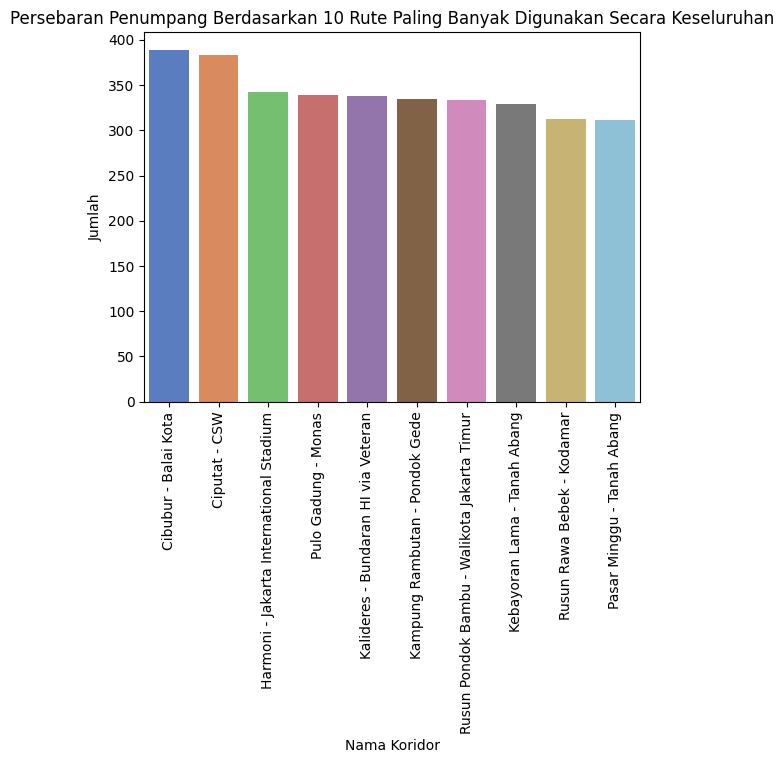

In [96]:
sns.countplot(data=df, x='corridorName', order=df.corridorName.value_counts().iloc[:10].index, palette="muted")
plt.xticks(rotation=90)
plt.title('Persebaran Penumpang Berdasarkan 10 Rute Paling Banyak Digunakan Secara Keseluruhan')
plt.xlabel('Nama Koridor')
plt.ylabel('Jumlah')

#### Persebaran Penumpang Berdasarkan 10 Rute Paling Banyak Digunakan Berdasarkan Jam Kerja

Analisis ini dilakukan untuk mengetahui rute apa saja yang paling banyak digunakan oleh penumpang Transjakarta berdasarkan jam kerja.

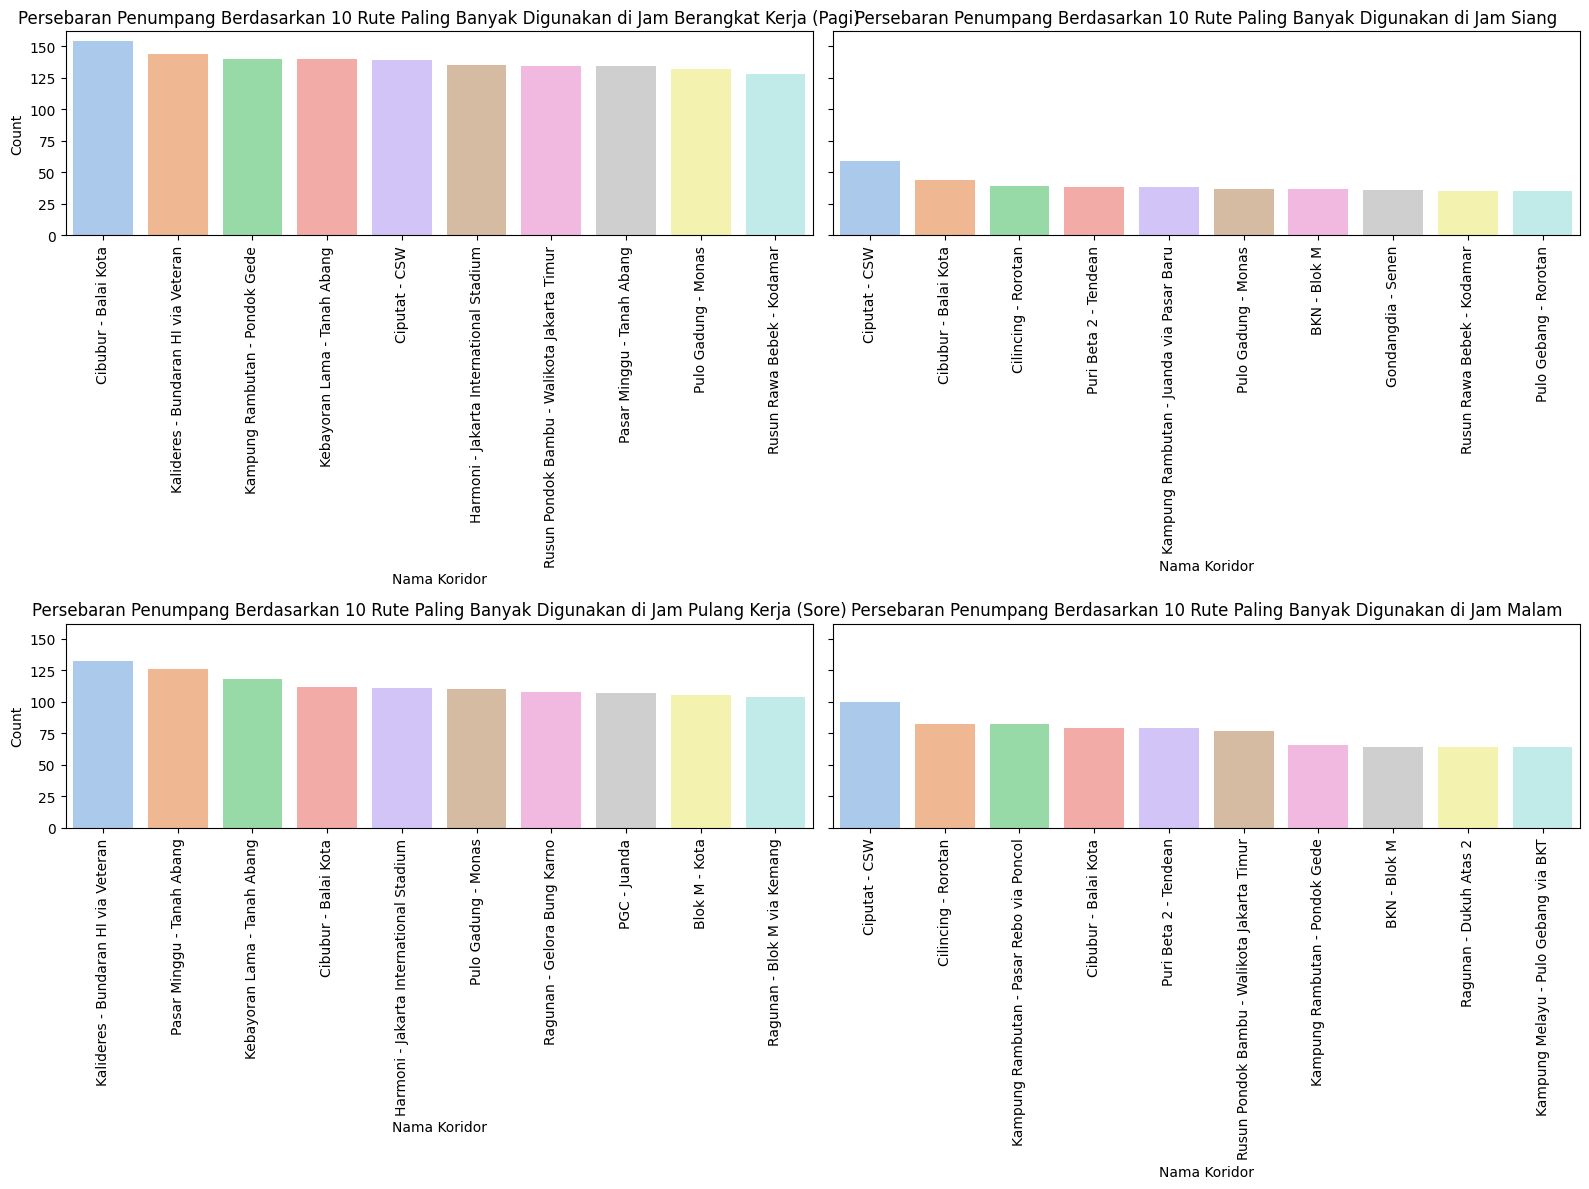

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharey=True)

time_classes = [
    'Jam Berangkat Kerja (Pagi)',
    'Jam Siang',
    'Jam Pulang Kerja (Sore)',
    'Jam Malam'
]
titles = [
    'Persebaran Penumpang Berdasarkan 10 Rute Paling Banyak Digunakan di Jam Berangkat Kerja (Pagi)',
    'Persebaran Penumpang Berdasarkan 10 Rute Paling Banyak Digunakan di Jam Siang',
    'Persebaran Penumpang Berdasarkan 10 Rute Paling Banyak Digunakan di Jam Pulang Kerja (Sore)',
    'Persebaran Penumpang Berdasarkan 10 Rute Paling Banyak Digunakan di Jam Malam'
]

for i, ax in enumerate(axes.flat):
    time_class = time_classes[i]
    sns.countplot(
        data=df[df['time_classification'] == time_class],
        x='corridorName',
        order=df[df['time_classification'] == time_class]
        .corridorName.value_counts().iloc[:10].index,
        palette="muted",
        ax=ax
    )
    ax.set_title(titles[i])
    ax.set_xlabel('Nama Koridor')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


#### Persebaran Penumpang Berdasarkan 10 Rute Paling Banyak Digunakan Berdasarkan Jenis Layanan

Analisis ini dilakukan untuk mengetahui rute apa saja yang paling banyak digunakan oleh penumpang Transjakarta berdasarkan jenis layanan yang digunakan.

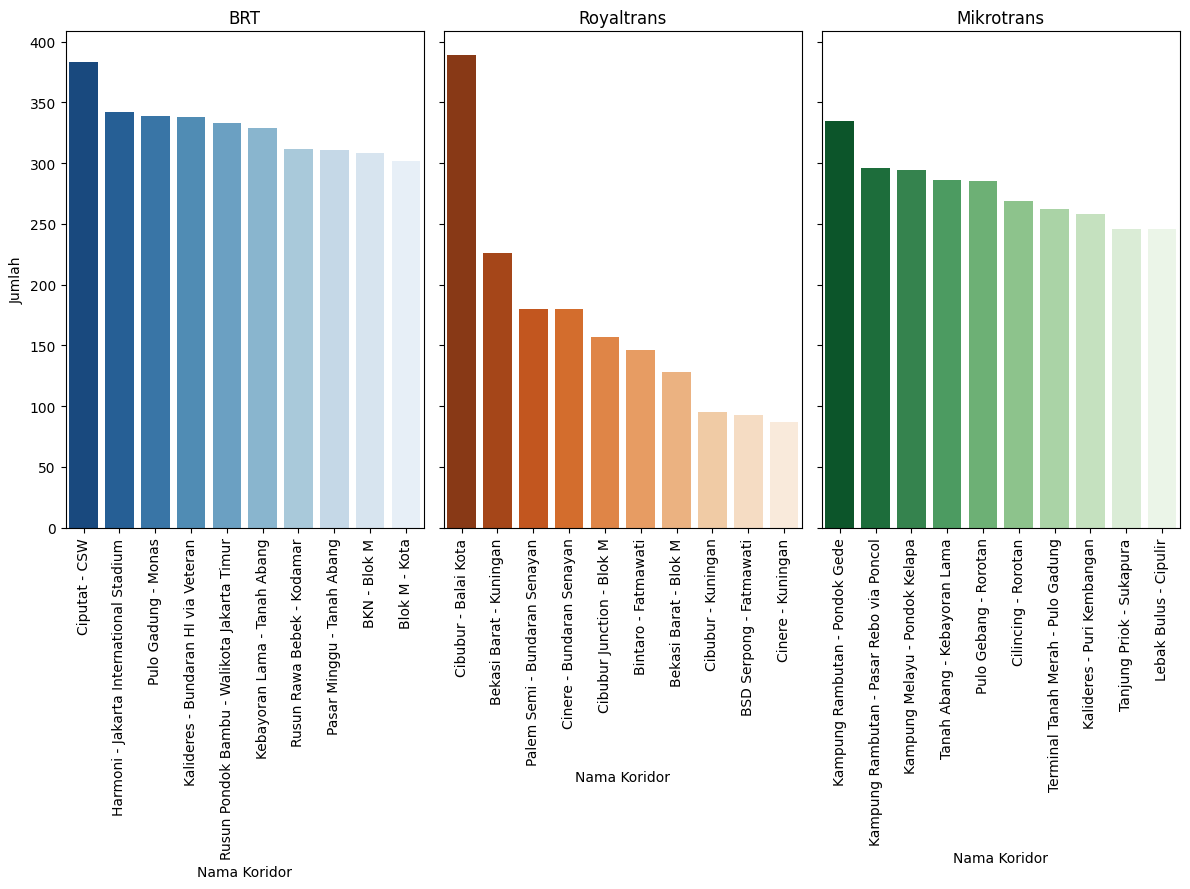

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 9), sharey=True)

time_classes = [
    'BRT',
    'Royaltrans',
    'Mikrotrans',
]
titles = [
    'BRT',
    'Royaltrans',
    'Mikrotrans',
]
palettes = [
    sns.color_palette("Blues", 10)[::-1],
    sns.color_palette("Oranges", 10)[::-1],
    sns.color_palette("Greens", 10)[::-1]
]
for i, ax in enumerate(axes.flat):
    time_class = time_classes[i]
    sns.countplot(
        data=df[df['bus_type'] == time_class],
        x='corridorName',
        order=df[df['bus_type'] == time_class]
        .corridorName.value_counts().iloc[:10].index,
        palette=palettes[i],
        ax=ax
    )
    ax.set_title(titles[i])
    ax.set_xlabel('Nama Koridor')
    ax.set_ylabel('Jumlah')
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


#### Analisis Persebaran Penumpang Berdasarkan Rute

1. Secara keseluruhan, penumpang Transjakarta paling banyak menggunakan rute **Cibubur - Balai Kota**, **Ciputat - CSW**, dan **Harmoni - Jakarta International Stadium**. <br>
Hal ini mungkin disebabkan oleh:
    - Balai Kota Jakarta adalah pusat pemerintahan DKI Jakarta dan berdekatan dengan area bisnis seperti Sudirman dan Thamrin.
    - CSW menghubungkan berbagai moda transportasi, seperti TransJakarta, MRT, dan angkot. Warga Ciputat mungkin menggunakan rute ini untuk mengakses koridor MRT yang efisien menuju pusat kota. Area CSW juga berada di dekat pusat bisnis dan perkantoran di Jakarta Selatan.
    - Jakarta International Stadium adalah salah satu ikon baru Jakarta yang sering digunakan untuk acara besar, seperti pertandingan sepak bola, konser, dan event komunitas, menarik massa dari berbagai wilayah. Harmoni juga menghubungkan berbagai koridor TransJakarta, memudahkan masyarakat untuk menjangkau JIS dari berbagai penjuru Jakarta.

2. Berdasarkan jam kerja, penumpang Transjakarta banyak yang menggunakan rute **Cibubur - Balai Kota** & **Kalideres - Bundaran HI via Veteran** pada Jam Berangkat Kerja (Pagi), **Ciputat - CSW** & **Cibubur - Balai Kota** pada Jam Siang, **Kalideres - Bundaran HI via Veteran** & **Pasar Minggu - Tanah Abang** pada Jam Pulang kerja (Sore), dan **Ciputat - CSW** & **Cilincing - Rorotan** pada Jam Malam. <br>
Hal ini mungkin disebabkan oleh:
    - Daerah Balai Kota dan Bundaran HI merupakan daerah pusat baik pusat pemerintahan maupun pusat bisnis, sehingga banyak orang yang kerja berangkat pagi menuju lokasi sekitar daerah tersebut.
    - Rute **Ciputat - CSW** & **Cibubur - Balai Kota** digunakan di siang hari mungkin karena di luar jam sibuk, untuk keperluan pribadi, atau shift kerja tertentu.
    - Banyaknya orang yang pulang kerja yang berada di sekitar rute **Kalideres - Bundaran HI via Veteran**, sedangkan daerah Pasar Minggu dan Tanah Abang merupakan daerah perdagangan dan pekerja pasar mungkin sering menggunakan rute ini untuk mencapai daerah.
    - Banyaknya orang yang kerja lembur di sekitar **Ciputat - CSW** & **Cilincing - Rorotan** sehingga pulang pada Jam Malam.
    - Beberapa rute yang tidak dijelaskan dapat diasumsikan sebagai berikut:
        - Rute yang ramai pada pagi dan sore hari merupakan rute menuju daerah pusat, sehingga banyak orang yang bekerja dan menggunakan Transjakarta.
        - Rute pada siang hari digunakan untuk orang yang kerja shift siang atau yang ingin berangkat di luar jam sibuk.
        - Rute pada malam hari digunakan untuk orang yang kerja lembur atau orang yang masih ada keperluan di malam hari.

3. Berdasarkan jenis layanan, dapat dianalisis sebagai berikut:
    - Rute BRT yang paling ramai merupakan rute menuju daerah pusat bisnis, pemerintahan, perdagangan, atau wisata.
    - Rute Royaltrans merupakan rute yang menghubungkan daerah penyangga ke pusat kota dan sebaliknya.
    - Rute Mikrotrans merupakan rute yang dapat mencakup daerah pemukiman di Jakarta.

## Kesimpulan

Berdasarkan hasil analisis, maka dapat disimpulkan beberapa hal, yaitu:
- Berdasarkan Data pada Kartu Pembayaran:
    - Kategori Dewasa mendominasi penumpang karena rutinitas pekerjaan dan pendidikan.
    - Perempuan lebih banyak menggunakan TransJakarta karena keamanannya dan kemudahan dalam perjalanan.
    - Bank DKI menjadi pilihan utama untuk pembayaran karena integrasi dengan layanan TransJakarta dan domisili mayoritas penumpang.
- Berdasarkan Waktu:
    - Hari Kerja merupakan hari paling ramai dikarenakan aktivitas pekerjaan dan pendidikan.
    - Tanggal 13 - 19 April 2023 lebih ramai dikarenakan periode khusus di bulan Ramadhan.
    - Jam Kerja paling ramai dikarenakan rutinitas harian yang terpusat pada jam berangkat dan pulang kerja.
- Berdasarkan Rute:
    - Penumpang TransJakarta paling banyak menggunakan rute Cibubur - Balai Kota, Ciputat - CSW, dan Harmoni - Jakarta International Stadium, karena rute ini menghubungkan pusat pemerintahan, bisnis, dan lokasi strategis untuk acara besar.
    - Puncak mobilitas penumpang terjadi pada jam berangkat dan pulang kerja, dengan rute populer menyesuaikan kebutuhan perjalanan menuju pusat kota, daerah perdagangan, dan kawasan yang aktif hingga malam hari.
    - Rute BRT menghubungkan pusat kota, Royaltrans mendukung komuter dari daerah penyangga, dan Mikrotrans melayani mobilitas masyarakat di area pemukiman Jakarta.

## Rekomendasi

Terdapat beberapa rekomendasi yang dapat diberikan setelah melakukan analisis. Rekomendasi yang diberikan adalah sebagai berikut:<br>

#### Umum<br>
**Optimalisasi Rute dan Jadwal**<br>
- Tingkatkan jumlah bus dan persingkat jarak waktu antar bus untuk rute yang ramai, hari kerja, dan jam kerja padat.<br>
Tujuan : Agar tidak terjadi penumpukan penumpang pada halte dan dalam bus itu sendiri. 
- Kurangi jumlah bus untuk rute yang sepi, hari libur, dan jam tidak padat untuk mengalokasi subsidi BBM ke rute yang ramai, hari kerja, dan jam kerja padat.<br> 
Tujuan : Agar menyeimbangi total subsidi BBM ke setiap rute.

#### Bus Rapid Transit (BRT)
**Penambahan Layanan Ekspres untuk Rute Utama**
- Sediakan lebih layanan ekspres dengan pada rute dengan permintaan tinggi untuk mengakomodasikan penumpang dengan waktu perjalanan lebih singkat. <br>
Tujuan : Agar penumpang lebih cepat sampai ke titik tujuan.<br>

**Penambahan Layanan Transjakarta Pink**
- Dengan banyaknya penumpang perempuan, maka sebaiknya persebaran bus Transjakarta Pink (Bus Khusus Perempuan) diratakan dan diperbanyak menjadi di setiap koridor. <br>
Tujuan : Untuk memberi rasa aman kepada perempuan dan menghindari terjadinya pelecehan seksual.

#### Royaltrans
**Penambahan Rute**
- Tambahkan rute yang menghubungkan area penyangga seperti Bekasi, Depok, dan Tangerang Selatan langsung ke pusat kota Jakarta.
Tujuan : Menambahkan akses bagi penumpang dari daerah penyangga yang ingin berangkat langsung ke pusat kota Jakarta.

#### Mikrotrans
**Penambahan Rute pada Pemukiman Baru**
- Tambahkan rute pada pemukiman baru yang belum terjangkau oleh layanan lain.
Tujuan : Meningkatkan konetivitas antar moda transportasi.<br>

**Penjadwalan Integrasi**
- Menyesuaikan jadwal Mikrotrans dengan keberangkatan layanan lain untuk memastikan transisi yang lancar antar moda.

## File Excel & CSV

Berikut akan dibuat *file* dalam bentuk *Excel* dan *CSV* dari data yang sudah dibersihkan dan diolah.

File *Excel*:

In [94]:
df.to_excel("TransjakartaCleanedVersion.xlsx")

File *CSV*

In [95]:
df.to_csv("TransjakartaCleanedVersion.csv")

## Dashboard

Untuk mengakses Dashboard dapat menggunakan [Link](https://public.tableau.com/app/profile/daffa.dzaky.naufal/viz/TransjakartaPublicTransportationTransaction/Home?publish=yes) berikut.